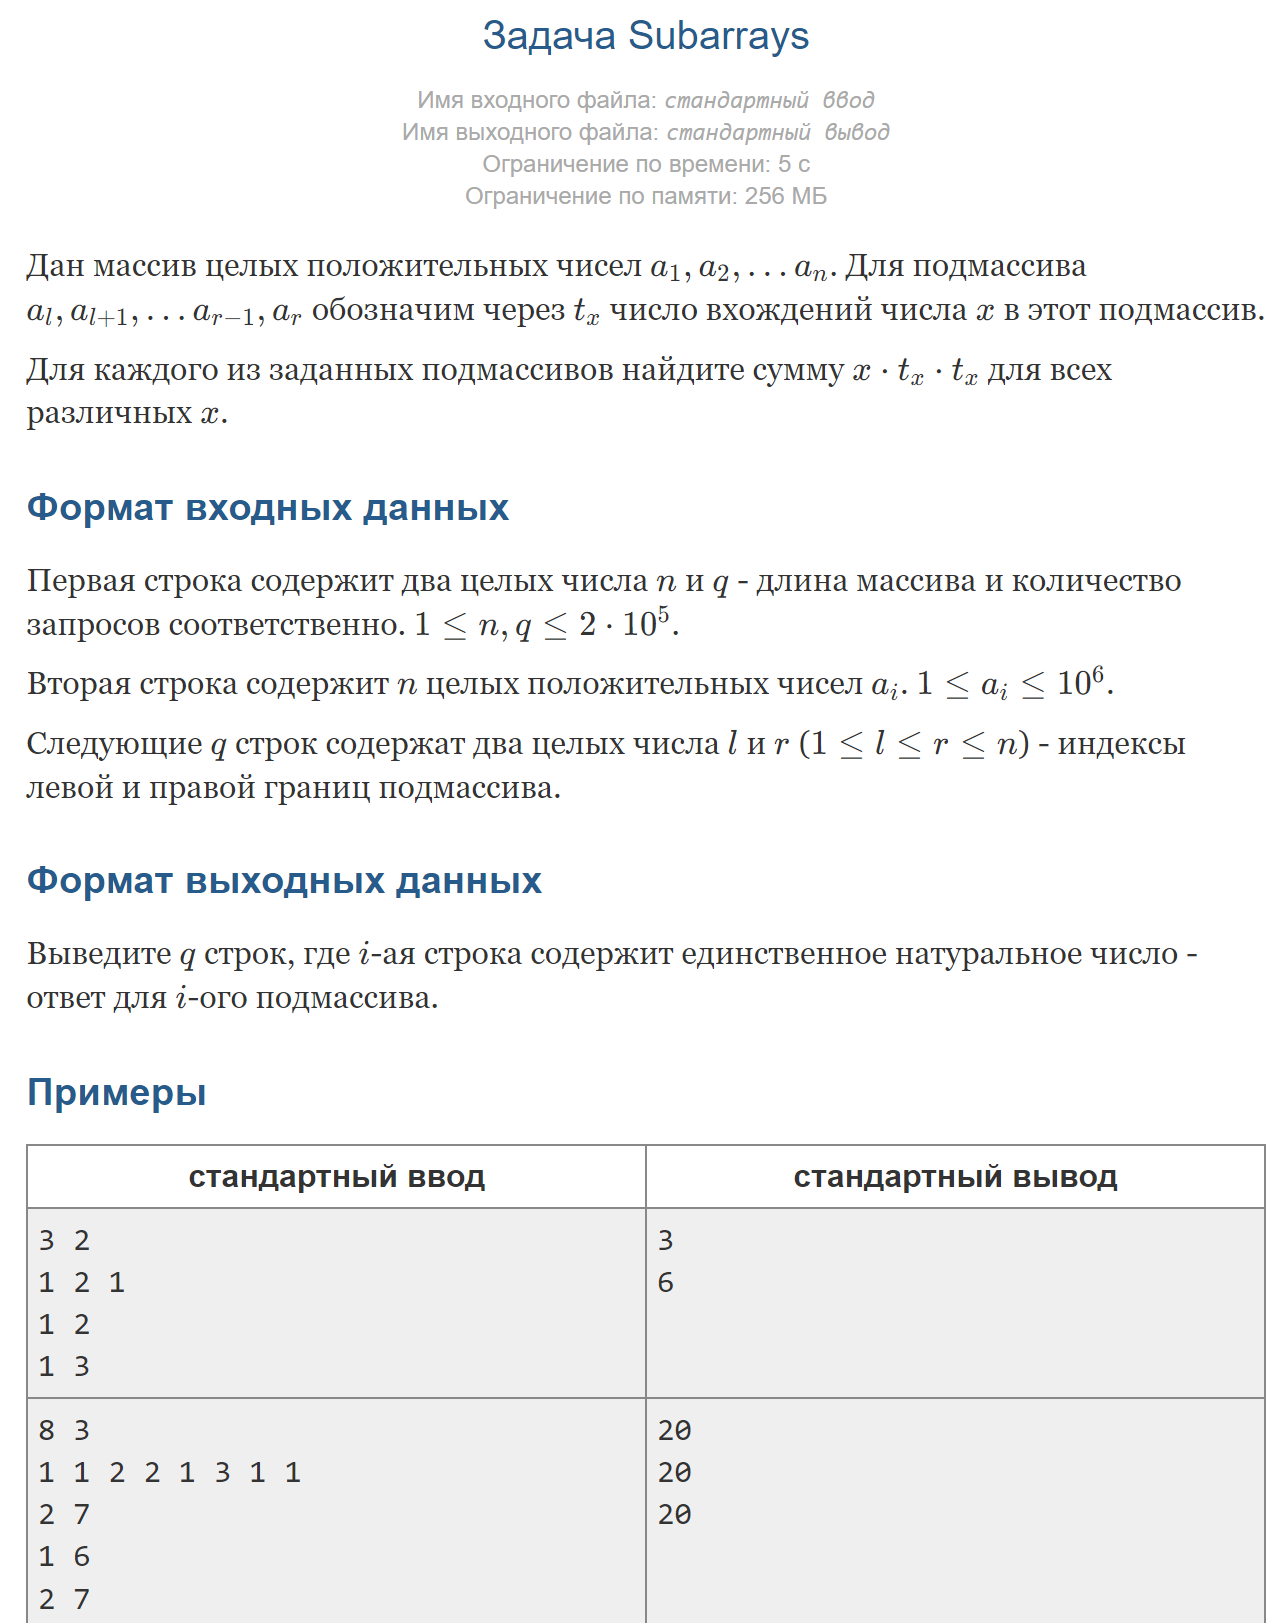

In [17]:
import math

def read_input():
    n, q = map(int, input().split())
    array = [0] + list(map(int, input().split()))

    blocks = math.ceil(math.sqrt(n))

    queries = []
    for _ in range(q):
        left, right = map(int, input().split())
        queries.append((left, right))

    return n, q, array, blocks, queries

def solve(n, q, array, blocks, queries):
    count_array = [0] * 1000005
    result = []

    def increase(idx, total_sum, count):
        nonlocal count_array
        total_sum -= count_array[array[idx]] * count_array[array[idx]] * array[idx]
        count_array[array[idx]] += 1
        total_sum += count_array[array[idx]] * count_array[array[idx]] * array[idx]
        return total_sum

    def decrease(idx, total_sum, count):
        nonlocal count_array
        total_sum -= count_array[array[idx]] * count_array[array[idx]] * array[idx]
        count_array[array[idx]] -= 1
        total_sum += count_array[array[idx]] * count_array[array[idx]] * array[idx]
        return total_sum

    id_queries = sorted([(left // blocks, right, i) for i, (left, right) in enumerate(queries)])

    total_sum = 0
    left = right = 0

    for i in range(q):
        query_id = id_queries[i][2]

        while left < queries[query_id][0]:
            total_sum = decrease(left, total_sum, count_array)
            left += 1
        while left > queries[query_id][0]:
            left -= 1
            total_sum = increase(left, total_sum, count_array)
        while right > queries[query_id][1]:
            total_sum = decrease(right, total_sum, count_array)
            right -= 1
        while right < queries[query_id][1]:
            right += 1
            total_sum = increase(right, total_sum, count_array)

        result.append(total_sum)

    return result

def write_output(result):
    for res in result:
        print(res)

def main():
    n, q, array, blocks, queries = read_input()
    result = solve(n, q, array, blocks, queries)
    write_output(result)

if __name__ == "__main__":
    main()

8 3
1 1 2 2 1 3 1 1
2 7
1 6
2 7
20
20
20


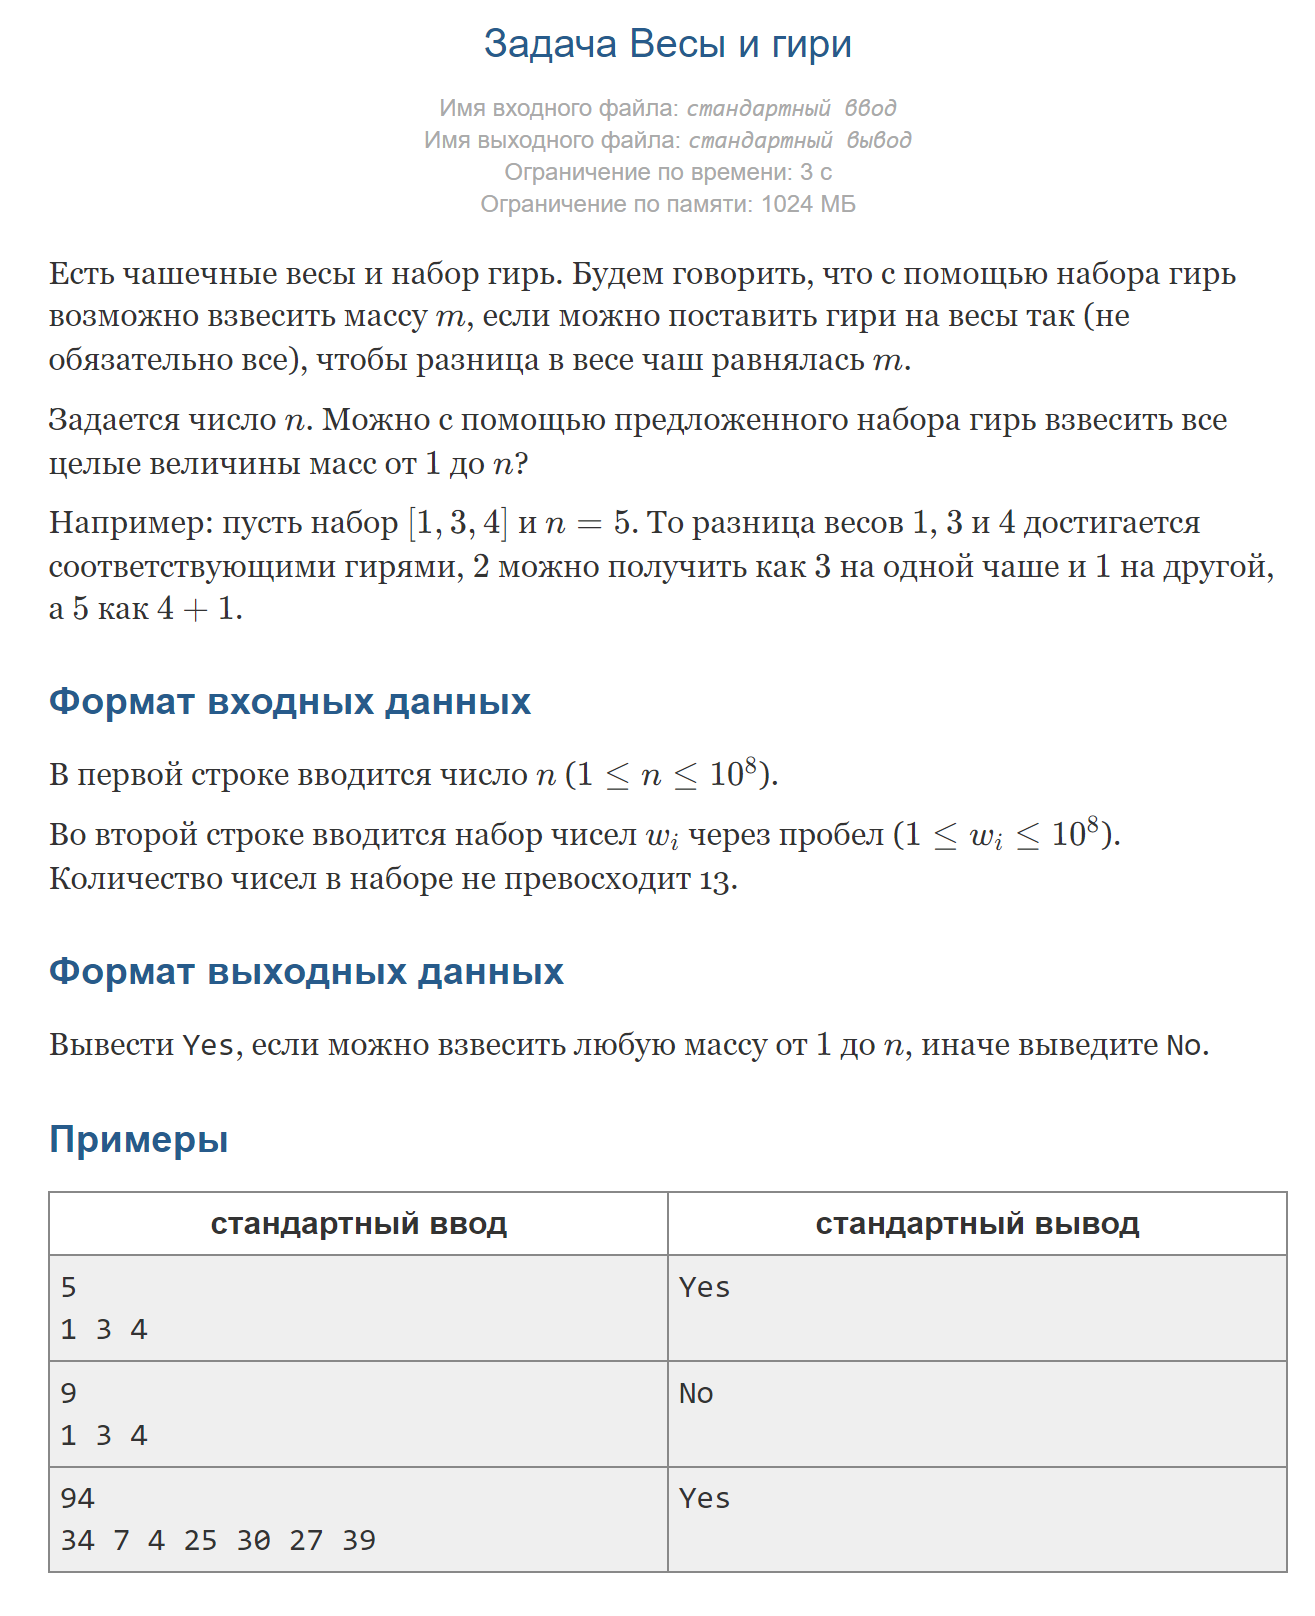

In [ ]:
def split_string(input_str):
    # Функция для разделения строки на числа и добавления их в список
    tokens = []
    for token in input_str.split():
        if token:
            tokens.append(int(token))
    return tokens

def main():
    n = int(input())
    s = input()
    nums = split_string(s)
    
    dp = [0] * 15  # Используем массив dp для хранения состояний весов
    used = [False] * (n + 1)  # Используем массив used для отметки возможных весов

    while dp[0] == 0:
        # Вычисление текущего веса
        current_weight = 0
        for i in range(1, len(nums) + 1):
            if dp[i] == 1:
                current_weight += nums[i - 1]
            elif dp[i] == 2:
                current_weight -= nums[i - 1]

        # Отметка возможного веса
        if 0 <= current_weight <= n:
            used[current_weight] = True

        # Обновление состояния dp
        ind = len(nums)
        while dp[ind] == 2:
            dp[ind] = 0
            ind -= 1
        dp[ind] += 1

    # Проверка, возможно ли взвесить все веса от 1 до n
    for i in range(1, n + 1):
        if not used[i]:
            print("No")
            return

    print("Yes")

if __name__ == "__main__":
    main()

In [8]:
def can_weigh_all_masses(target_mass, weight_set):
    dp = [False] * (target_mass + 1)
    dp[0] = True

    for weight in weight_set:
        for current_mass in range(weight, target_mass + 1):
            dp[current_mass] = dp[current_mass] or dp[current_mass - weight]

    return "Yes" if dp[target_mass] else "No"

# Чтение входных данных
target_mass = int(input())
weight_set = list(map(int, input().split()))

# Вывод результата
result = can_weigh_all_masses(target_mass, weight_set)
print(result)

94
34 7 4 25 30 27 39
Yes


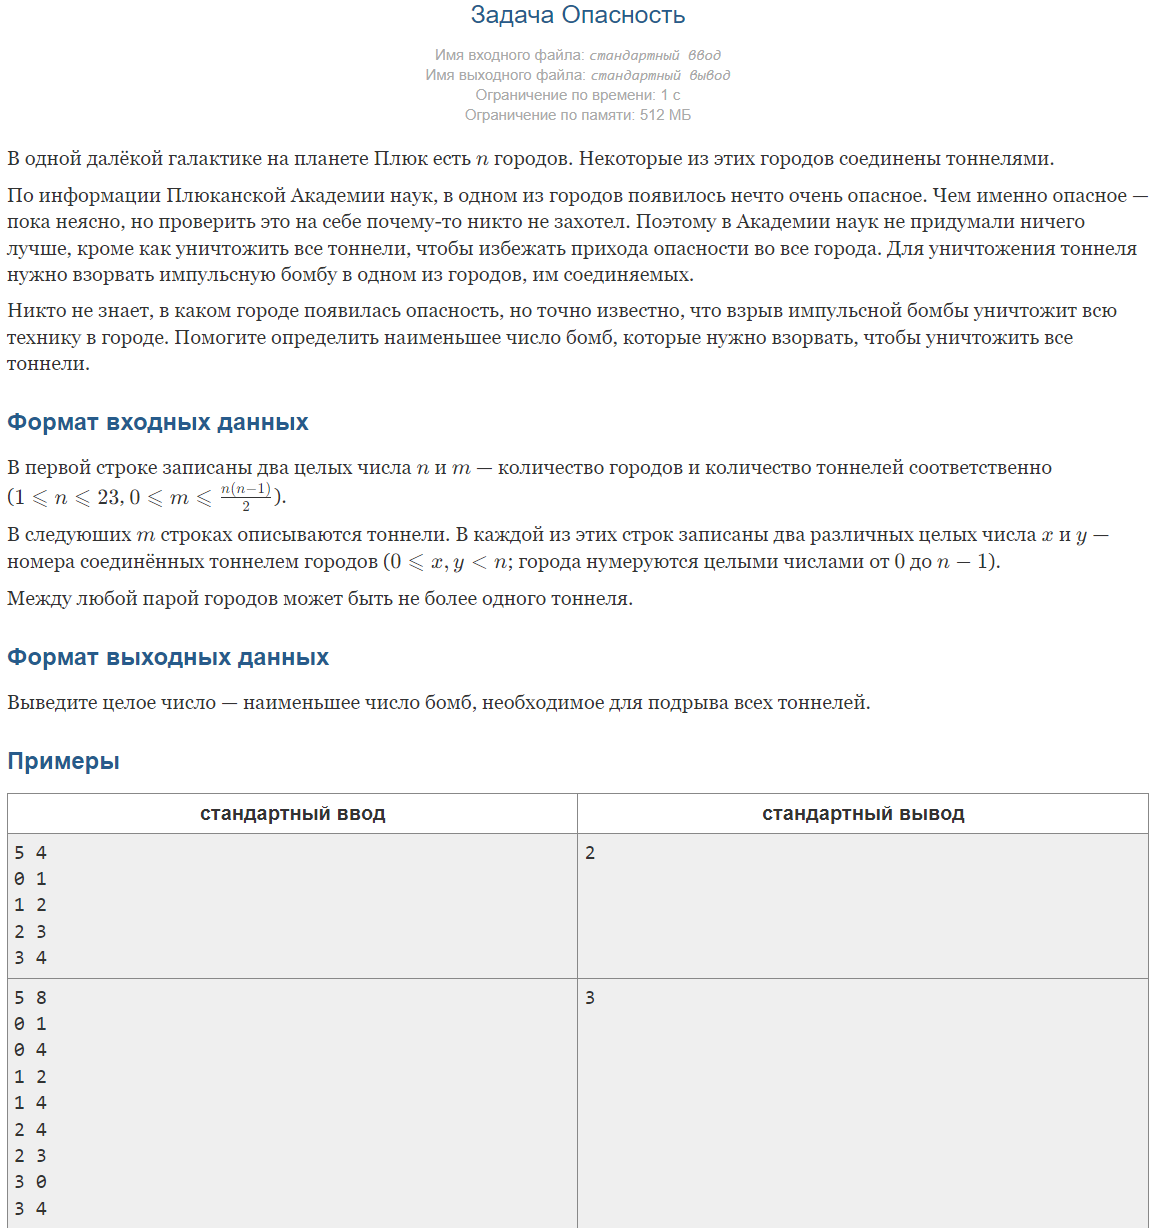

In [11]:
def destroy_tunnels(n, m, tunnels):
    dp = [0] * 25

    g = [[] for _ in range(n + 1)]
    cnt_used = [0] * (m + 1)

    for i in range(1, m + 1):
        f, f1 = tunnels[i - 1]
        f += 1
        f1 += 1
        g[f].append((f1, i))
        g[f1].append((f, i))

    cnt = 0
    cnt_ones = 0
    res = 1e9

    while dp[0] == 0:
        if cnt == m:
            res = min(res, cnt_ones)
        ind = n
        while dp[ind] == 1:
            cnt_ones -= 1
            for x in g[ind]:
                cnt_used[x[1]] -= 1
                if cnt_used[x[1]] == 0:
                    cnt -= 1
            dp[ind] = 0
            ind -= 1

        cnt_ones += 1
        for x in g[ind]:
            cnt_used[x[1]] += 1
            if cnt_used[x[1]] == 1:
                cnt += 1
        dp[ind] = 1

    return int(res)

def main():
    n, m = map(int, input().split())
    tunnels = [tuple(map(int, input().split())) for _ in range(m)]

    result = destroy_tunnels(n, m, tunnels)
    print(result)

if __name__ == "__main__":
    main()

5 4
0 1
1 2
2 3
3 4
2


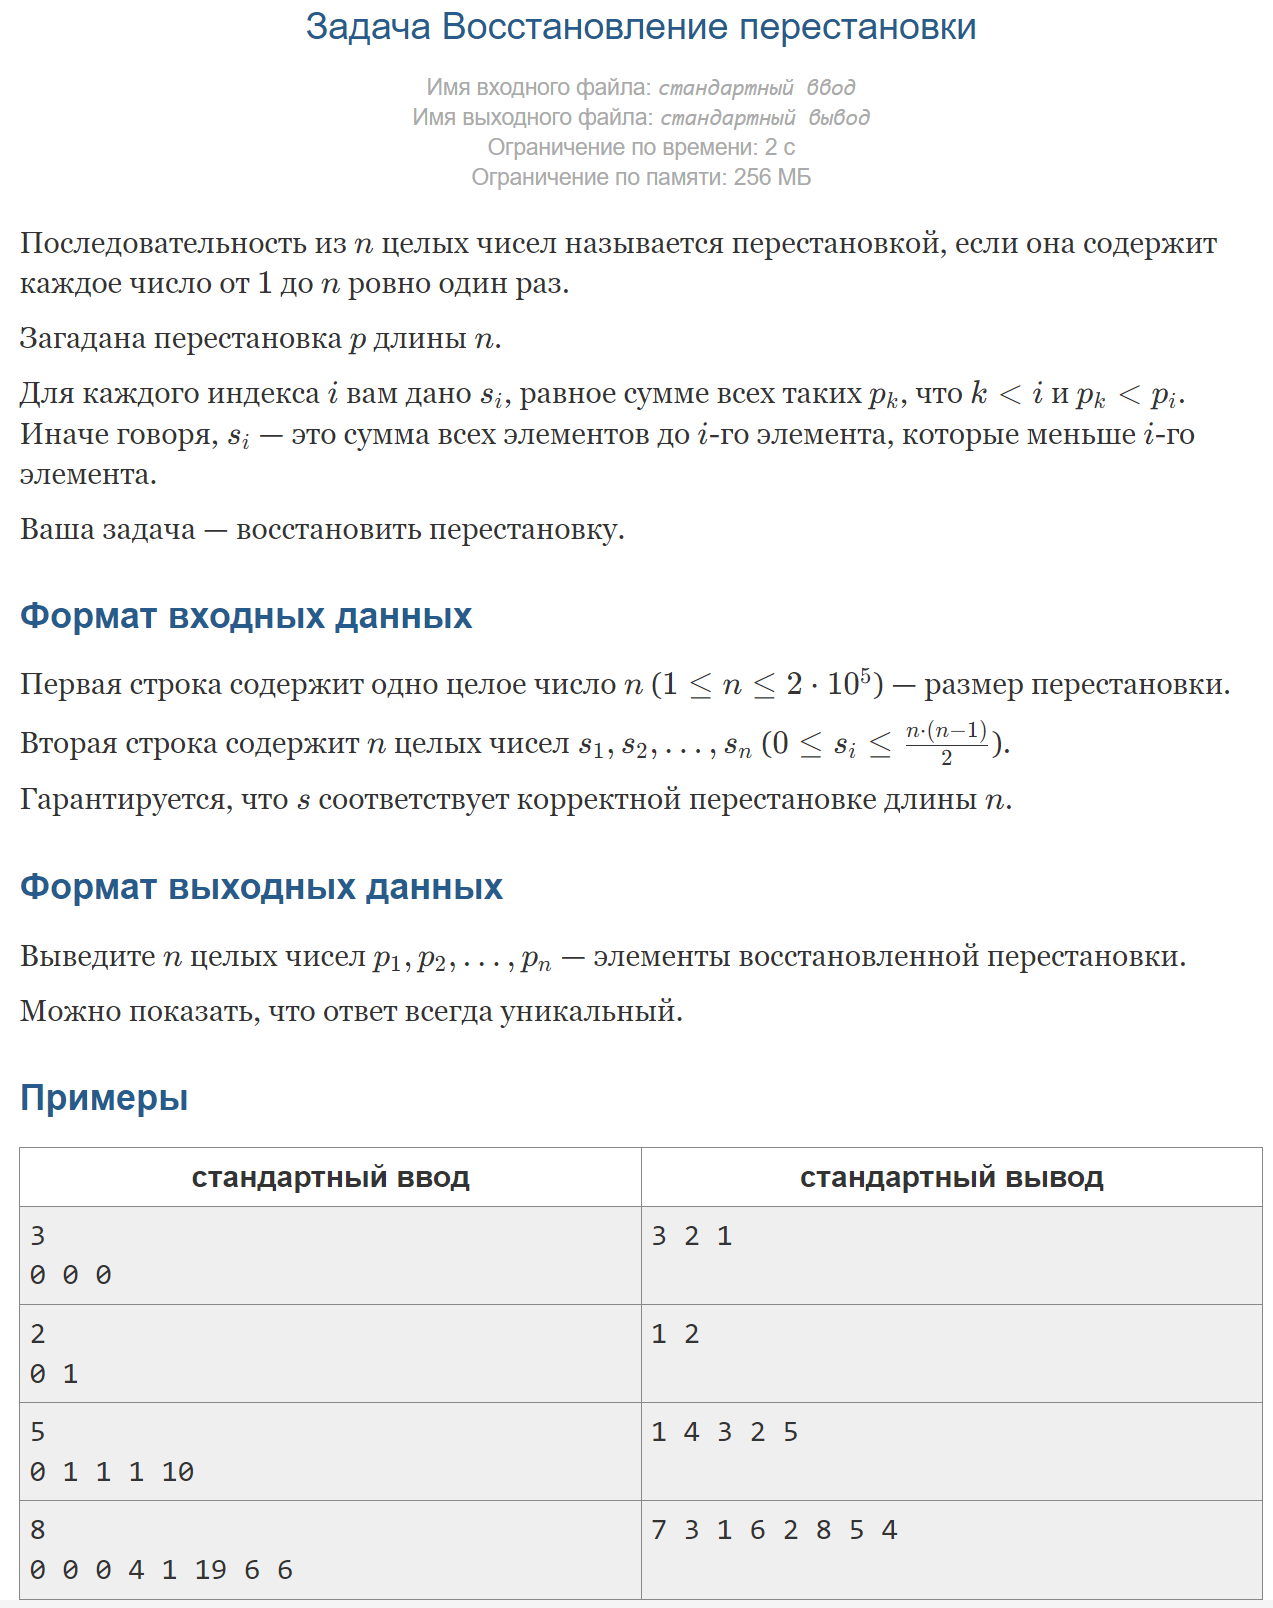

In [15]:
def update_tree(node_index, left, right, position, value, tree):
    # Обновление дерева отрезков
    if position < left or position > right:
        return
    elif left == right:
        tree[node_index] = value
    else:
        mid = (left + right) // 2
        left_child, right_child = 2 * node_index, 2 * node_index + 1
        update_tree(left_child, left, mid, position, value, tree)
        update_tree(right_child, mid + 1, right, position, value, tree)
        tree[node_index] = tree[left_child] + tree[right_child]

def query_tree(node_index, left, right, value, tree):
    # Поиск индекса восстановленной перестановки
    if left == right:
        return left
    else:
        mid = (left + right) // 2
        left_child, right_child = 2 * node_index, 2 * node_index + 1
        if tree[left_child] > value:
            return query_tree(left_child, left, mid, value, tree)
        else:
            return query_tree(right_child, mid + 1, right, value - tree[left_child], tree)

def restore_permutation(n, s):
    INF = 1e18
    permutation = [0] * (n + 1)
    segment_tree = [0] * (4 * n)

    # Инициализация дерева отрезков
    for i in range(1, n + 1):
        update_tree(1, 1, n, i, i, segment_tree)

    # Восстановление перестановки
    for i in range(n, 0, -1):
        permutation[i] = query_tree(1, 1, n, s[i - 1], segment_tree)
        update_tree(1, 1, n, permutation[i], 0, segment_tree)

    return permutation[1:]

def main():
    # Чтение входных данных
    size_of_permutation = int(input())
    s_values = list(map(int, input().split()))

    # Вызов функции и вывод результата
    restored_permutation = restore_permutation(size_of_permutation, s_values)
    print(*restored_permutation)

if __name__ == "__main__":
    main()

8
0 0 0 4 1 19 6 6
7 3 1 6 2 8 5 4
